<a href="https://colab.research.google.com/github/zfukuoka/Training-KikaiGakusyuZukan/blob/master/Chap2_04_SVM_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第２章  教師あり学習

## 04 線形サポートベクトルマシン

ポイント

* ここでは線形サポートベクトルマシーン二値分類の例
* 決定境界からのマージン最大化という基準で分類
  * 同じ線形の線形回帰よりも良い結果を得られることもある
* sklearn  の  LinearSVC クラスを用いて動かすことができる
* 最初に作成するデータは sklearn.datasetsのmake_blobs()で作る
  * 結果は、タプルである範囲とその分類結果
  * n_samplesパラメータで作成するデータの個数を設定
  * n_featuresパラメータで分類の個数を設定
  * centersパラメータは不明だが、おそらく範囲を定めたタプルの配列（配列の個数が次元を表す？）
  * clulster_stdパラメータは不明？
* 学習用と試験用データの分割は sklearn.model_selectionのtrain_test_split() を用いて行う
  * test_sizeパラメータが試験用の割合を指す
* LinearSVCクラスのインスタンス生成で空のモデルを作成
* LinearSVCのインスタンスにfit()を用いて学習
* 学習後にpredict()を用いて、試験用データを投入して試験


In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# データ生成
centers = [(-1, -0.125), (0.5, 0.5)]
X, y = make_blobs(
    n_samples=50, n_features=2,
    centers=centers, cluster_std=0.3
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

1.0

サンプルコードではわかりにくいので、matplotlibの等高線を示す contourf() を用いると、わかりやすい
* 元々、2次元の入力で予測結果がでるので、結果を3次元目として高さとする
* この等高線を示すために入力をメッシュ（格子状）にして細かいデータを作り、その結果（高さ）を得ることで可視化できる
  * メッシュにするために、numpyのmeshgrid()を用いて、範囲と粒度を指定して作成。しかし入力の1次元毎になっていたものが2次元毎の出力になるかは不明
  * 上記のように2次元結果になってしまい、改めて結果を得るためにravel()を用いて1次元の入力に変える必要が出てくる
  * matplotlibのcontourf()もなぜかX,Y,Z軸ごとに2次元の入力になるか不明

下記のプロットは、学習用データのプロットを〇×で分けてプロットしたうえで格子状の結果から色分けしている。

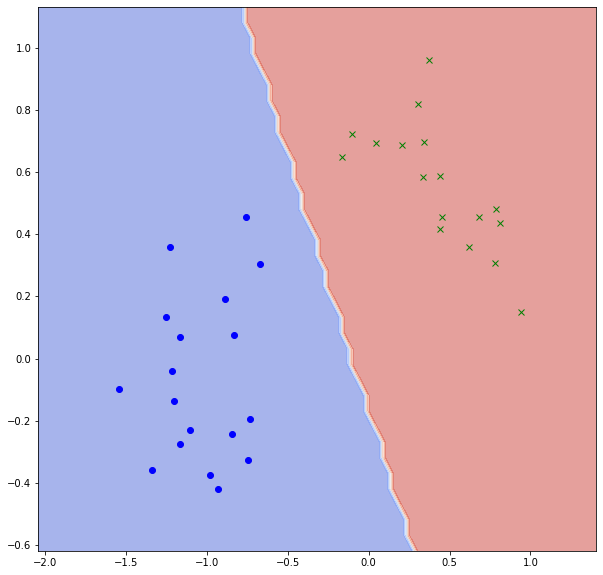

In [23]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min() - 0.5, x.max() + 0.5
  y_min, y_max = y.min() - 0.2, y.max() + 0.2
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

import numpy as np
yy = np.array(y_train)
y0 = np.where(yy==0)
y1 = np.where(yy==1)
mesh_x, mesh_y = make_meshgrid(X_train[0:,0], X_train[0:,1], h=0.05)
mesh_z = model.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()])

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(X_train[y0,0], X_train[y0,1], "bo")
ax.plot(X_train[y1,0], X_train[y1,1], "gx")
ax.contourf(
    mesh_x, mesh_y, mesh_z.reshape(mesh_x.shape),
    cmap=plt.cm.coolwarm, alpha=0.5, zorder=-10)
